## Correlation Matrix

## Correlation between the balance, amount and status

In [1]:
import pandas as pd

df = pd.read_csv("./preprocessed/mergedTrainData.csv")
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,loan_id,years_since_loan,amount,duration,payments,status,balance,years_since_acc_open,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of cities,ratio of urban inhabitants,average salary,no. of enterpreneurs per 1000 inhabitants,unemployment_rate,no. of commited crimes,no. of municipalities with inhabitants > 2000
loan_id,1.000000,0.054697,-0.036967,-0.021638,-0.036130,0.144961,-0.077286,0.057843,0.119419,-0.006781,-0.009348,-0.073618,0.092046,0.124609,0.099405,-0.074867,0.112186,-0.017973
years_since_loan,0.054697,1.000000,-0.145705,-0.194637,0.009200,-0.026971,-0.002405,0.819355,0.089062,-0.080576,-0.019278,-0.050335,0.029825,0.086263,0.129022,-0.087696,0.097971,-0.021099
amount,-0.036967,-0.145705,1.000000,0.587811,0.650868,-0.107125,0.135270,-0.106606,-0.026219,0.058690,0.075923,0.028084,-0.055783,-0.025669,0.002828,0.000460,-0.025704,0.070926
duration,-0.021638,-0.194637,0.587811,1.000000,-0.123847,0.018446,-0.020214,-0.133931,-0.057586,0.065013,0.059019,0.031273,-0.062320,-0.057665,-0.030047,0.004007,-0.061668,0.057336
payments,-0.036130,0.009200,0.650868,-0.123847,1.000000,-0.172982,0.159220,-0.008030,-0.033645,0.039583,0.065562,0.060211,-0.056081,-0.030298,-0.018763,0.021741,-0.030196,0.063923
status,0.144961,-0.026971,-0.107125,0.018446,-0.172982,1.000000,0.205275,-0.012735,0.004529,0.045904,0.042580,0.027227,-0.011035,0.035679,0.034579,-0.017753,0.001900,0.042631
balance,-0.077286,-0.002405,0.135270,-0.020214,0.159220,0.205275,1.000000,-0.079715,-0.045882,0.024499,0.089157,0.002379,-0.093352,-0.047615,-0.035561,-0.001951,-0.046122,0.084379
years_since_acc_open,0.057843,0.819355,-0.106606,-0.133931,-0.008030,-0.012735,-0.079715,1.000000,0.037806,-0.012337,0.017431,0.008742,-0.001716,0.022475,0.075133,-0.076728,0.047204,0.010265
no. of inhabitants,0.119419,0.089062,-0.026219,-0.057586,-0.033645,0.004529,-0.045882,0.037806,1.000000,-0.552464,-0.552379,-0.623069,0.705444,0.918226,0.714154,-0.518426,0.995701,-0.565038
no. of municipalities with inhabitants < 499,-0.006781,-0.080576,0.058690,0.065013,0.039583,0.045904,0.024499,-0.012337,-0.552464,1.000000,0.444606,0.415229,-0.637639,-0.623284,-0.298484,0.100054,-0.531382,0.409288


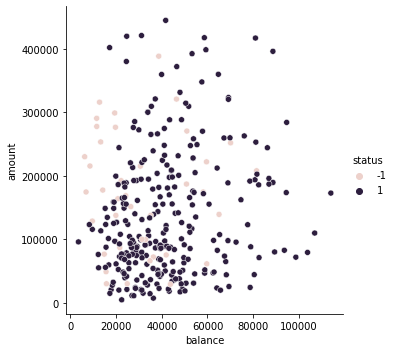

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt # for plotting graphs

sns.relplot(y="amount", x="balance", hue="status", data=df)
plt.savefig('plots/dataUnderstanding/balance_ammount_scatterPlot.png')

Looking at this plot, we can observe that most of the unsuccessful loans are usually located on the left part of the chart, which means that people with low balances on their accounts are prone to fail loan payments.

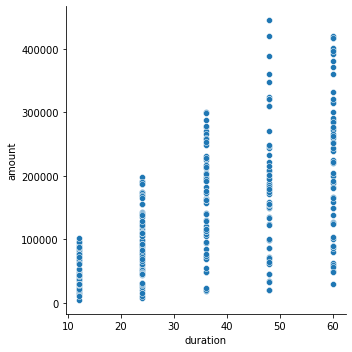

In [3]:
sns.relplot(y="amount", x="duration", data=df)
plt.savefig('plots/dataUnderstanding/ammount_duration_scatterPlot.png')

As we can see in this plot, higher duration loans result typically in higher amounts.

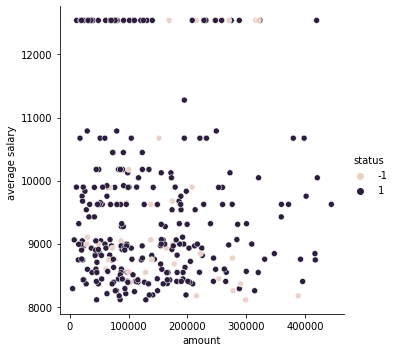

In [4]:
sns.relplot(x="amount", y="average salary ", hue="status", data=df)
plt.savefig('plots/dataUnderstanding/avgSalary_ammount.png')